<a href="https://colab.research.google.com/github/Nitesh-kelwani/Colab-practice-notebooks/blob/main/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Lets create synthetic data points for classification
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000, n_features=2,n_classes=2,  n_redundant=0, n_clusters_per_class=1)

In [4]:
pd.DataFrame(x)[0]

,0
0,1.224309
1,2.704608
2,-0.610438
3,0.913425
4,1.591804
...,...
995,1.870982
996,0.671605
997,0.291765
998,1.820249


<Axes: xlabel='0', ylabel='1'>

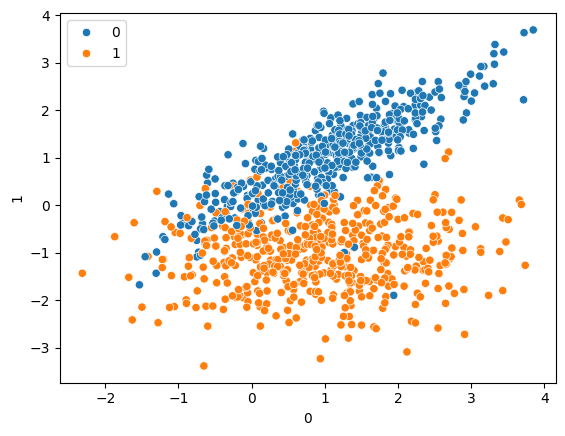

In [5]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.svm import SVC

In [8]:
svc=SVC(kernel='linear') # Taking kernal as linear becase the datapoints the seprable

In [9]:
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [10]:
ypred=svc.predict(xtest)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.93      0.93      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[145  10]
 [ 10 135]]


In [13]:
svc.intercept_,svc.coef_

(array([-0.70265385]), array([[ 1.06200631, -2.24343994]]))

In [14]:
x,y=make_classification(n_samples=1000, n_features=2,n_classes=2,  n_redundant=0, n_clusters_per_class=2,random_state=42)

<Axes: xlabel='0', ylabel='1'>

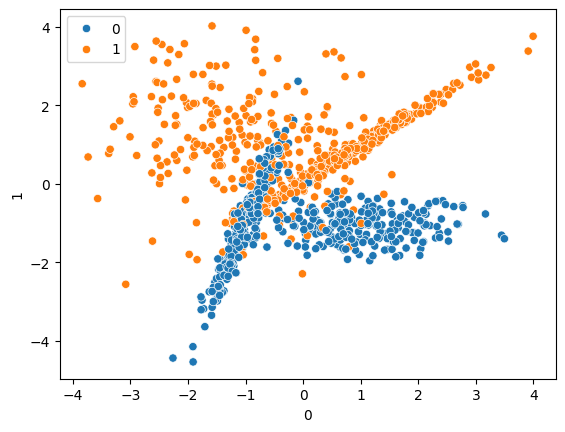

In [15]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [16]:
rbf=SVC(kernel='rbf')

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [18]:
rbf.fit(xtrain,ytrain)

SVC()

In [19]:
ypred=rbf.predict(xtest)

In [20]:
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       148
           1       0.93      0.84      0.88       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[139   9]
 [ 25 127]]


In [21]:
rbf.intercept_

array([0.41785408])

In [22]:
#Taking kernal as polynomial
poly=SVC(kernel='poly')
poly.fit(xtrain,ytrain)
ypred=poly.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       148
           1       0.87      0.89      0.88       152

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[128  20]
 [ 17 135]]


In [23]:
sig=SVC(kernel='sigmoid')
sig.fit(xtrain,ytrain)
ypred=sig.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       148
           1       0.78      0.82      0.79       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[112  36]
 [ 28 124]]


Hyperperameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
pream_grid={'C':[0.1,1,10,100,100],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [26]:
grid=GridSearchCV(SVC(),param_grid=pream_grid,cv=5,verbose=3,refit=True)

In [27]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.886 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [29]:
ypred=grid.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       148
           1       0.98      0.83      0.90       152

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

[[145   3]
 [ 26 126]]
